In [1]:
%pip -q install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [49]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
def f(x):
    return 3*x**2 - 4*x + 5

In [51]:
f(-3.0)

44.0

In [52]:
xs = np.arange(-5, 5, 0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [53]:
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

In [54]:
# f(np.array([1,2]))

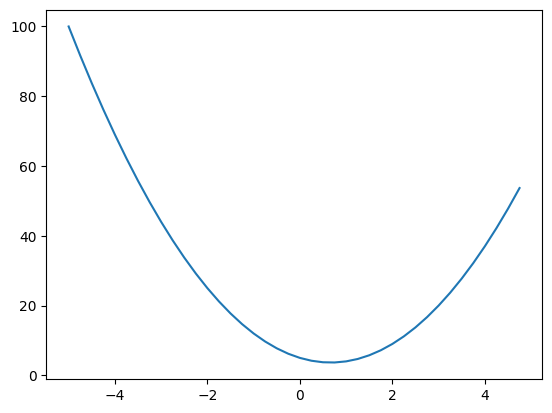

In [55]:
plt.plot(xs, ys)

In [56]:
## Slope is in positive direction when x is positve, so when you add h, the function would go UP in the graph
x = 3.0
h = 0.00000001
print(f(h))
print(f(x))
print(f(x + h))
print("Rise =", f(x + h) - f(x))
print("Normalized by h =", (f(x + h) - f(x)) / h)

4.99999996
20.0
20.00000014
Rise = 1.400000009255109e-07
Normalized by h = 14.00000009255109


In [57]:
## Slope is in negative direction when x is negative, so when you add h, the function would go DOWN in the graph
x = -3.0
h = 0.00000001
print(f(h))
print(f(x))
print(f(x + h))
print("Rise =", f(x + h) - f(x))
print("Normalized by h =", (f(x + h) - f(x)) / h)

4.99999996
44.0
43.999999779999996
Rise = -2.200000039920269e-07
Normalized by h = -22.00000039920269


In [58]:
x = 2/3
h = 0.000001
print("Normalized by h =", (f(x + h) - f(x)) / h)

Normalized by h = 2.999378523327323e-06


In [59]:
# Let's get more complex
a = 2.0
b = -3.0
c = 10.0

d = a*b + c
d

4.0

In [60]:
h = 0.0001

a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a += h
d2 = a*b + c

print("d1 =", d1)
print("d2 =", d2)
print("slope =", (d2 - d1) / h)

# The slope value is actually the value of b. This is proved analytically as well as mathematically through derivation of the equation (derivative of d wrt a)

d1 = 4.0
d2 = 3.999699999999999
slope = -3.000000000010772


In [61]:
h = 0.0001

a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
b += h
d2 = a*b + c

print("d1 =", d1)
print("d2 =", d2)
print("slope =", (d2 - d1) / h)

d1 = 4.0
d2 = 4.0002
slope = 2.0000000000042206


In [62]:
h = 0.0001

a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h
d2 = a*b + c

print("d1 =", d1)
print("d2 =", d2)
print("slope =", (d2 - d1) / h)
# a*b will be constant even if c changes, so its derivative wrt c will be 0
# derivation of d wrt c = 1

d1 = 4.0
d2 = 4.0001
slope = 0.9999999999976694


In [63]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self._prev = set(_children)
        self.grad = 0.0
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')
    
    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')

In [64]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
print("d=",d)
print("d.prev=",d._prev)
print("d.op=",d._op)

d= Value(data=4.0)
d.prev= {Value(data=10.0), Value(data=-6.0)}
d.op= +


In [65]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

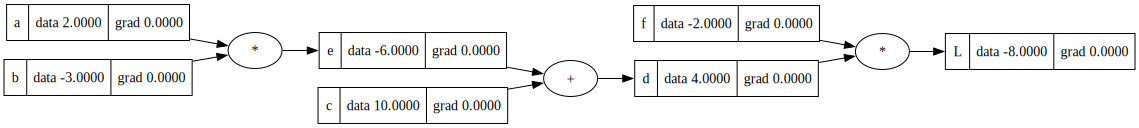

In [66]:
import os
os.environ["PATH"] += os.pathsep + '/opt/homebrew/Cellar/graphviz/12.2.1/bin'
draw_dot(L)

In [67]:
# We are going to add a new field in the Value that will store the derivative of L, with respect to that value, which is called "grad"

In [68]:
def lol():
    h = 0.0001

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1 = L.data

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L2 = L.data + h

    print((L2 - L1)/h)

lol()

0.9999999999976694


# manual backpropagation

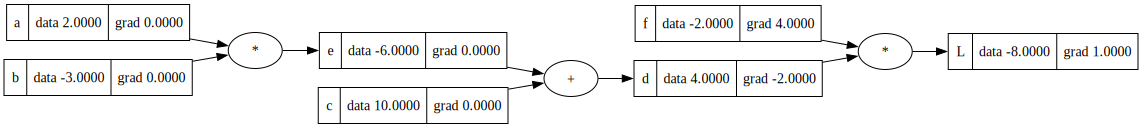

In [69]:
# manual backpropagation

L.grad = 1
d.grad = -2
f.grad = 4

draw_dot(L)

In [70]:
## Here comes the important part
# dL/dc - changing c will impact L through d

# Formula - dL/dc = dL/dd * dd/dc - Chain rule in calculus

# dd/dc - local derivative, since we have L at the last point.

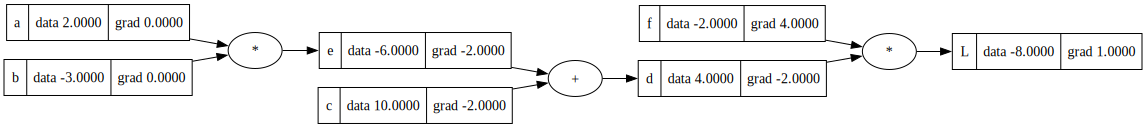

In [71]:
# dL/dd = -2
# dd/dc = 1 (d = c + e, dd/dc = 1 + 0 = 1)
# dL/dc = -2 * 1 = -2
c.grad = -2.0

# dL/dd = -2
# dd/de = 1 (d = c + e, dd/de = 0 + 1 = 1)
# dL/de = -2 * 1 = -2
e.grad = -2.0

draw_dot(L)

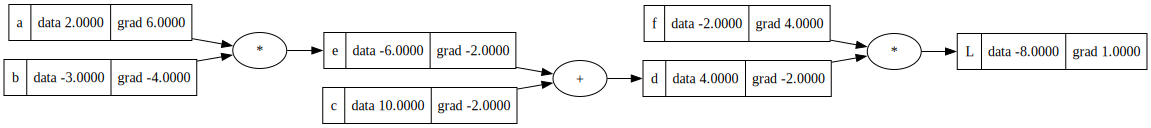

In [72]:
# dL/db = dL/de * de/db
# de/db = a = 2
# dL/de = -2
# dL/db = -2 * 2 = -4
b.grad = -4.0

# dL/da = dL/de * de/da
# de/da = b = -3
# dL/de = -2
# dL/da = -2 * -3 = 6
a.grad = 6.0

draw_dot(L)

#### Backpropagation - We recursively go through in backward direction and multiplying with the local derivatives

### Forward Pass 
#### Now, nudge the leaf nodes in the direction of gradient to improve L

In [73]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

In [76]:
e = a * b
d = e + c
L = d * f

print(L.data) # L increased by 1, -8 to -7
# grad gives the direction of the steepest ascent of the function
# grad helps to influence the final outcome

-7.286496


# Complex yet useful - BP though Neuron